# Initialise file

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (40, 20)

# Load CSVs

In [8]:
files = glob.glob("../data/*.csv")
print files

['../data/St Peters.csv', '../data/Erskineville.csv', '../data/Waterloo.csv', '../data/The Rocks.csv', '../data/Sydney.csv', '../data/Millers Point.csv', '../data/Rosebery.csv', '../data/Dawes Point.csv', '../data/Elizabeth Bay.csv', '../data/Potts Point.csv', '../data/Centennial Park.csv', '../data/Newtown.csv', '../data/Camperdown.csv', '../data/Redfern.csv', '../data/Forest Lodge.csv', '../data/Eveleigh.csv', '../data/Haymarket.csv', '../data/Pyrmont.csv', '../data/Annandale.csv', '../data/Zetland.csv', '../data/Chippendale.csv', '../data/Alexandria.csv', '../data/Moore Park.csv', '../data/Barangaroo.csv', '../data/Paddington.csv', '../data/Beaconsfield.csv', '../data/Woolloomooloo.csv', '../data/Glebe.csv', '../data/Ultimo.csv', '../data/Rushcutters Bay.csv', '../data/Darlington.csv', '../data/Surry Hills.csv', '../data/Darlinghurst.csv']


In [40]:
def get_day(x):
    return x["SALE DATE"].day


def get_month(x):
    return x["SALE DATE"].month


def get_year(x):
    return x["SALE DATE"].year


def separate_date(x):
    x["SALE DAY"] = x.apply(get_day, axis=1)
    x["SALE MONTH"] = x.apply(get_month, axis=1)
    x["SALE YEAR"] = x.apply(get_year, axis=1)

    
def get_suburb(filepath):
    suburb = filepath.split("/")
    suburb = suburb[2].split(".")
    suburb = suburb[0]
    return suburb


def process_csv(filepath):
    suburb = get_suburb(filepath)
    read_file = pd.read_csv(filepath,
                infer_datetime_format=True,
                parse_dates=["SALE DATE"],
                dayfirst=True)
    read_file["SUBURB"] = suburb
    separate_date(read_file)
    return read_file

In [41]:
sales_data = pd.concat([process_csv(f) for f in files], ignore_index=True)
sales_data = sales_data.drop_duplicates(subset=["DEALING NUMBER"])

In [42]:
sales_data[1000:1500].head(1)

,ADDRESS,SALE PRICE,SALE DATE,AREA,STRATA/NON STRATA,MULTI-PROPERTY SALE (Y/N),PROPERTY NUMBER,DEALING NUMBER,EXTRACTION DATE,SUBURB,SALE DAY,SALE MONTH,SALE YEAR
1069,"197/177 MITCHELL ROAD, ERSKINEVILLE NSW 2043",442500,2012-11-21,0.0,STRATA,Yes (2),2135419,AH484788,30 April 2017,Erskineville,21,11,2012


## Write to new CSV

In [43]:
sales_data.to_csv("../sydney_sales_combined.csv")

In [8]:
sales_data = pd.read_csv("../combined_data/sydney_sales_combined.csv")

# Graph test

## By price

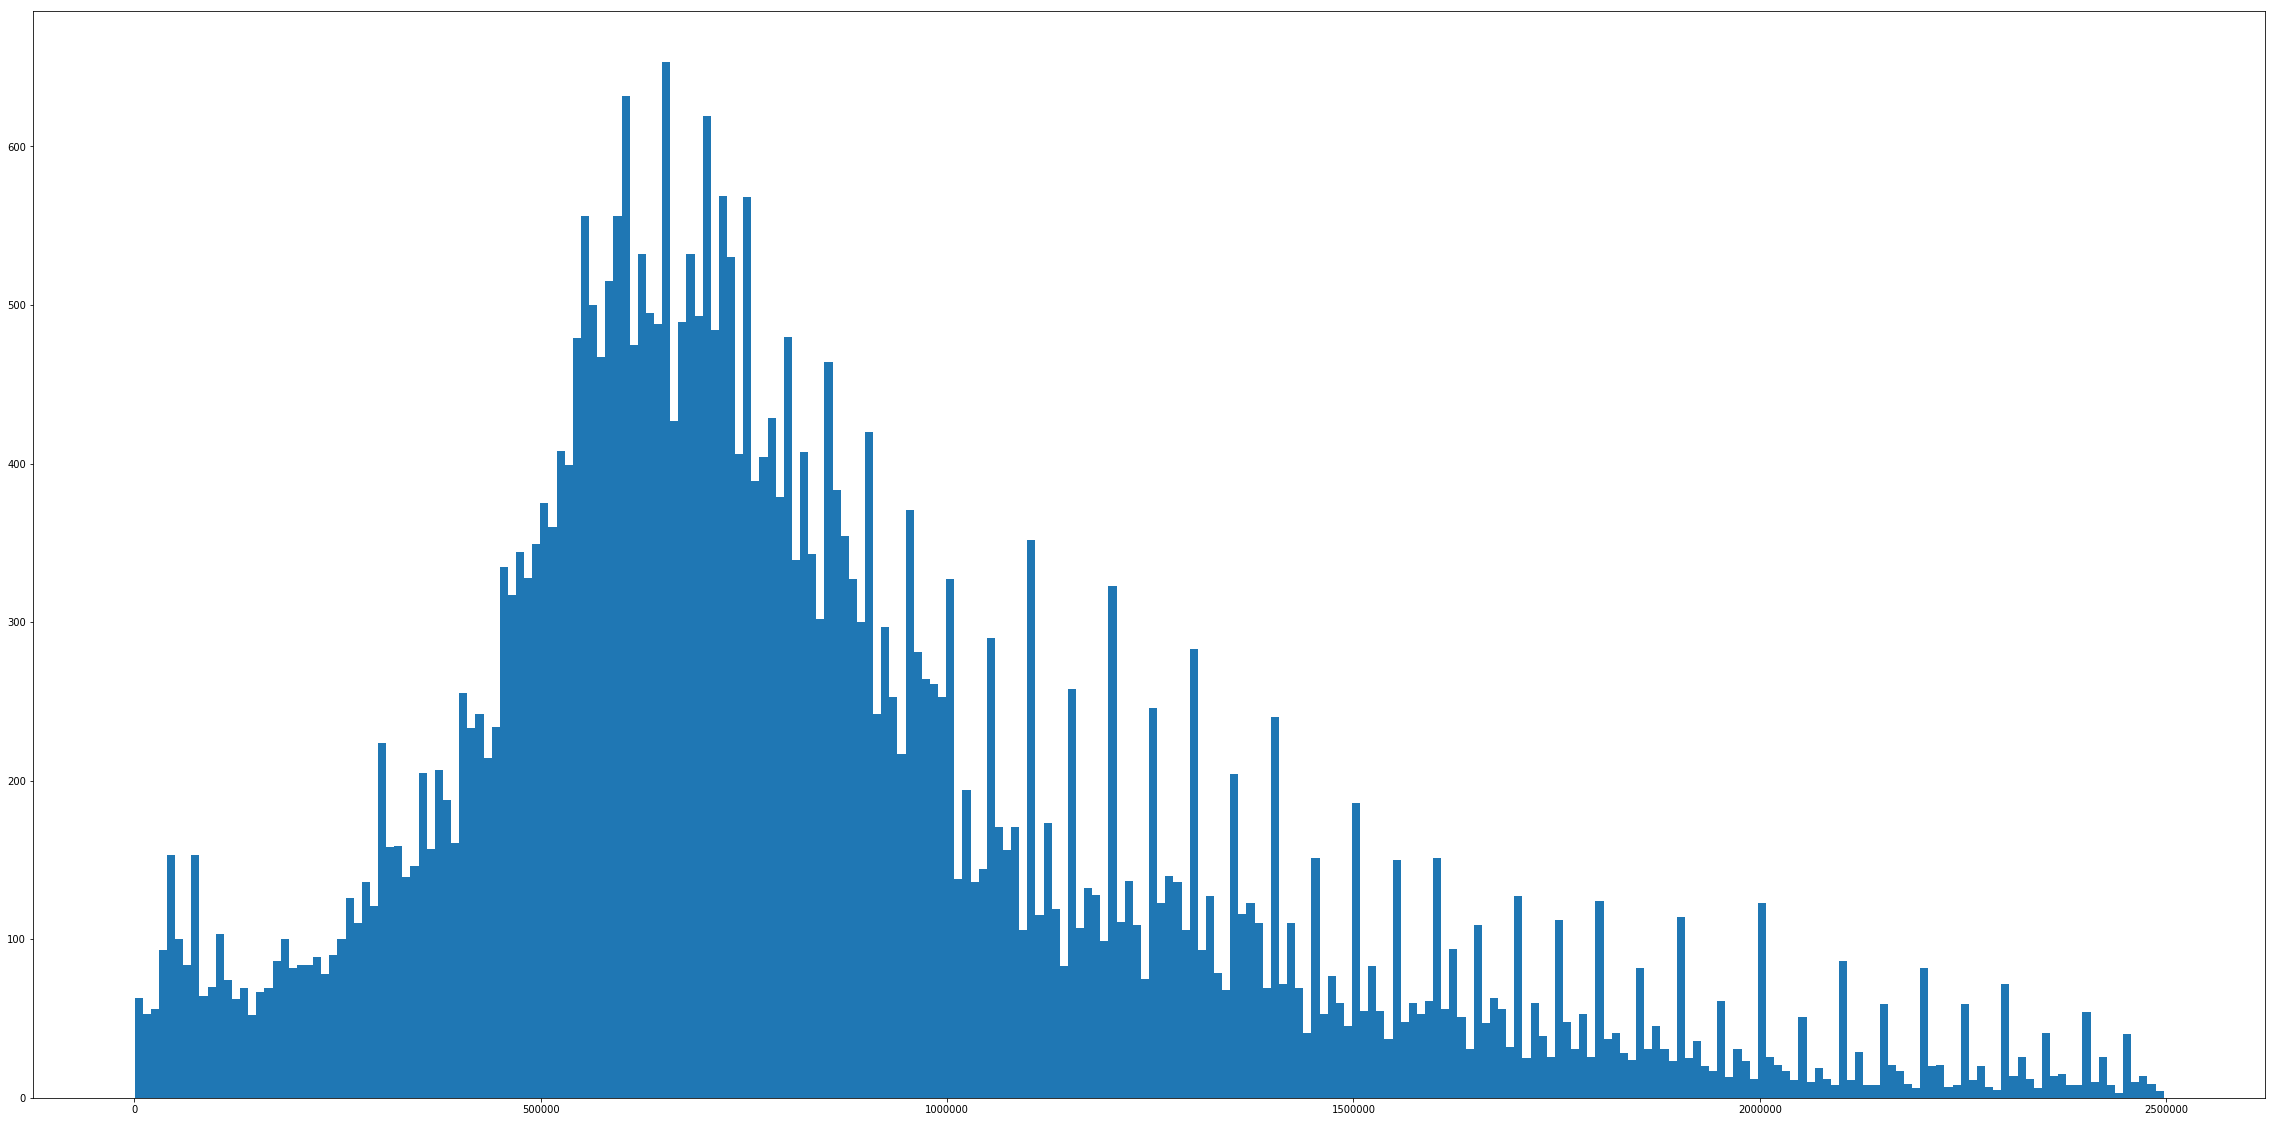

In [9]:
plt.hist(sales_data['SALE PRICE'][sales_data["SALE PRICE"] < 2500000], bins=250)
plt.show()

## Strata vs Non Strata

In [10]:
data_list = sales_data["STRATA/NON STRATA"]
data_series = pd.Series(data_list)
non_strata_pattern = ["NON STRATA" in x for x in data_series]
strata_pattern = ["STRATA" in x for x in data_series]

non_strata_price = sales_data["SALE PRICE"][non_strata_pattern]
strata_price = sales_data["SALE PRICE"][strata_pattern]

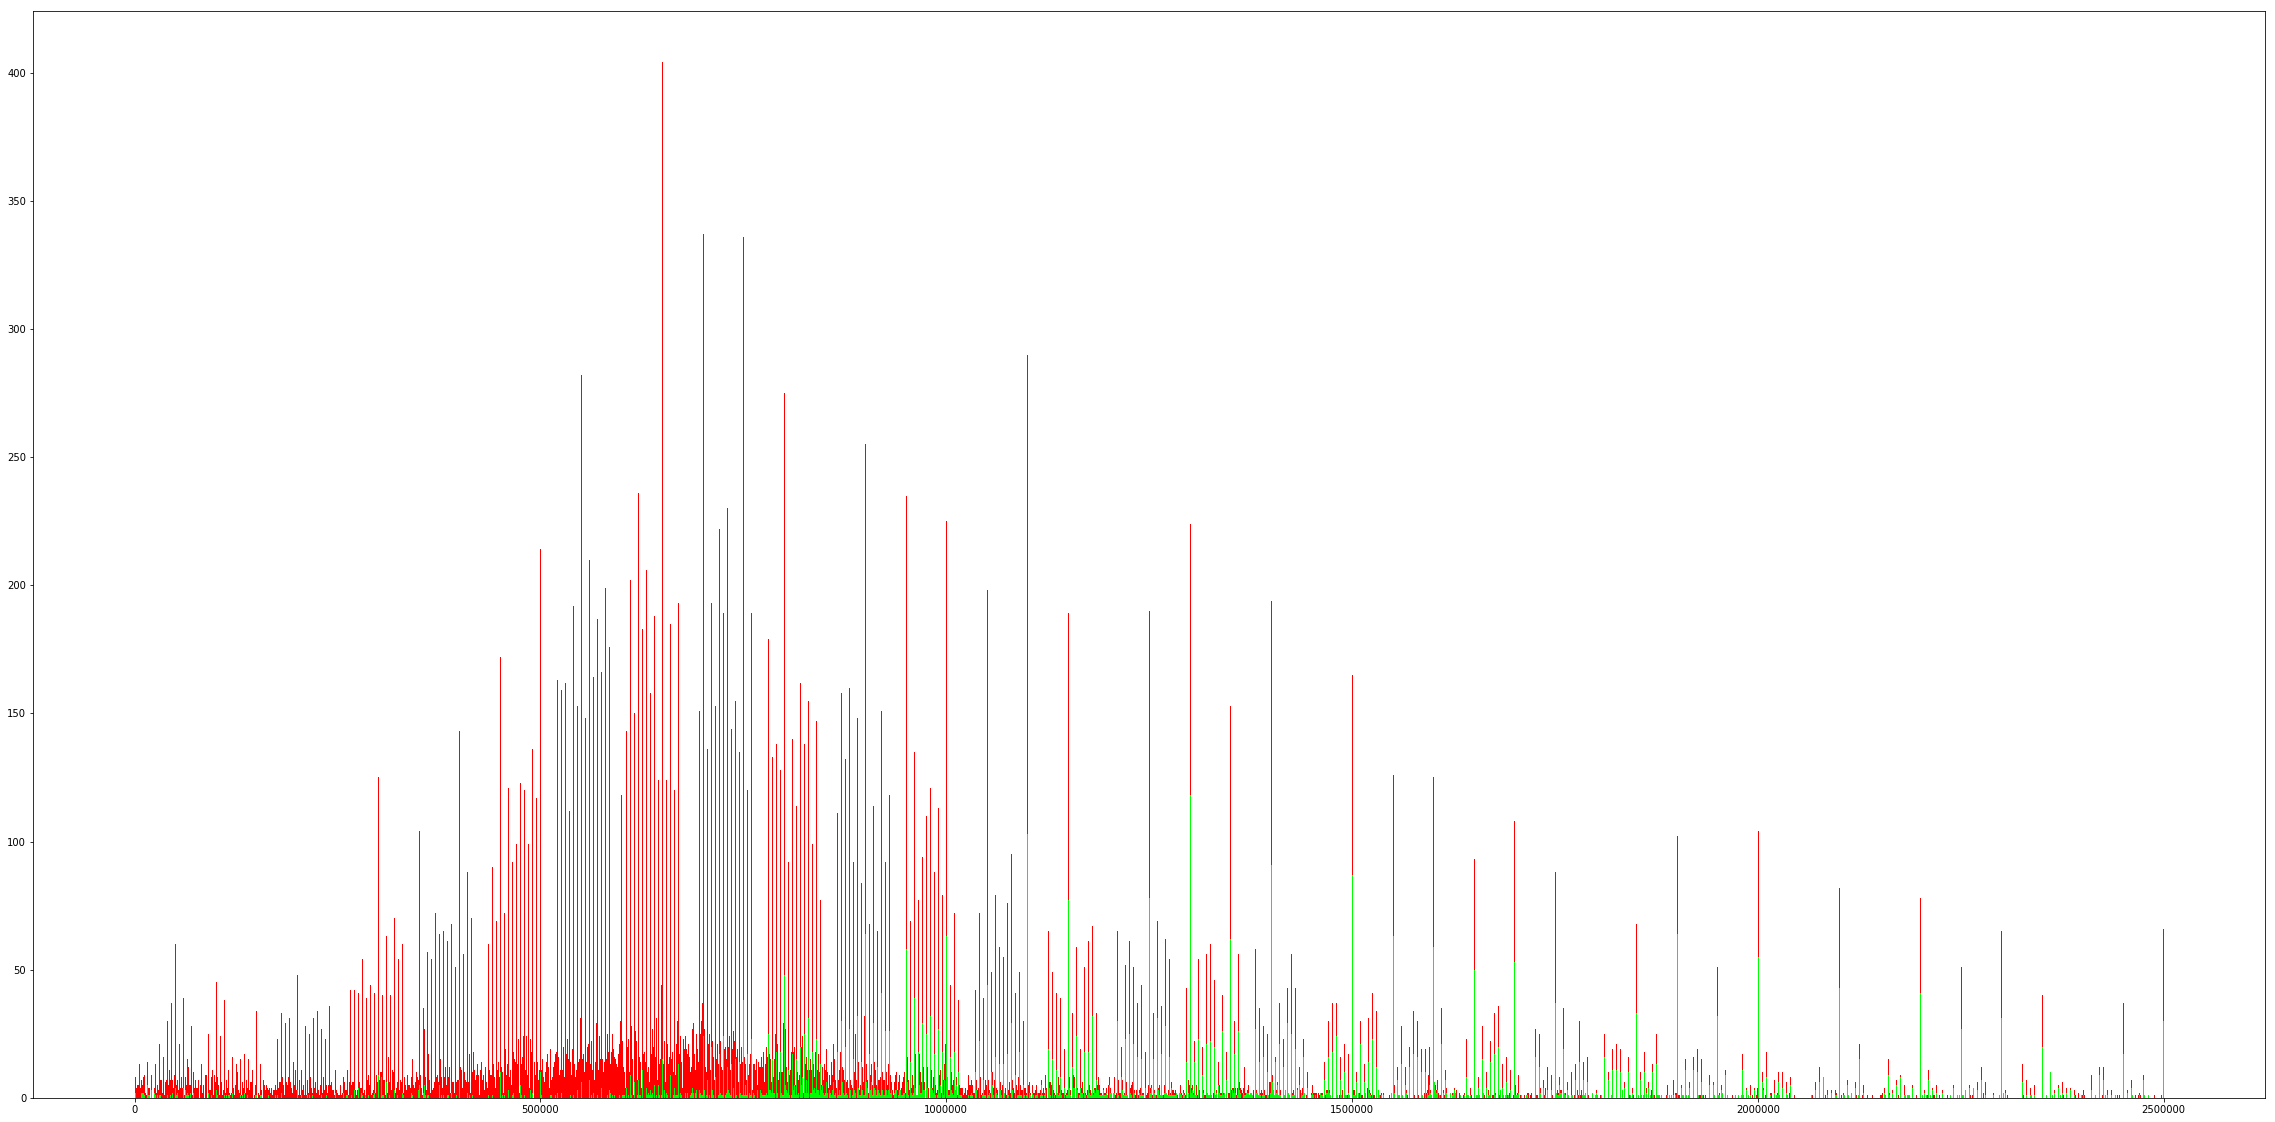

In [11]:
plt.hist(strata_price, bins=2500, range=(0, 2500000), facecolor="#FF0000", alpha=1)
plt.hist(non_strata_price, bins=2500, range=(0, 2500000), facecolor="#00FF00", alpha=1)
plt.show()

## By month

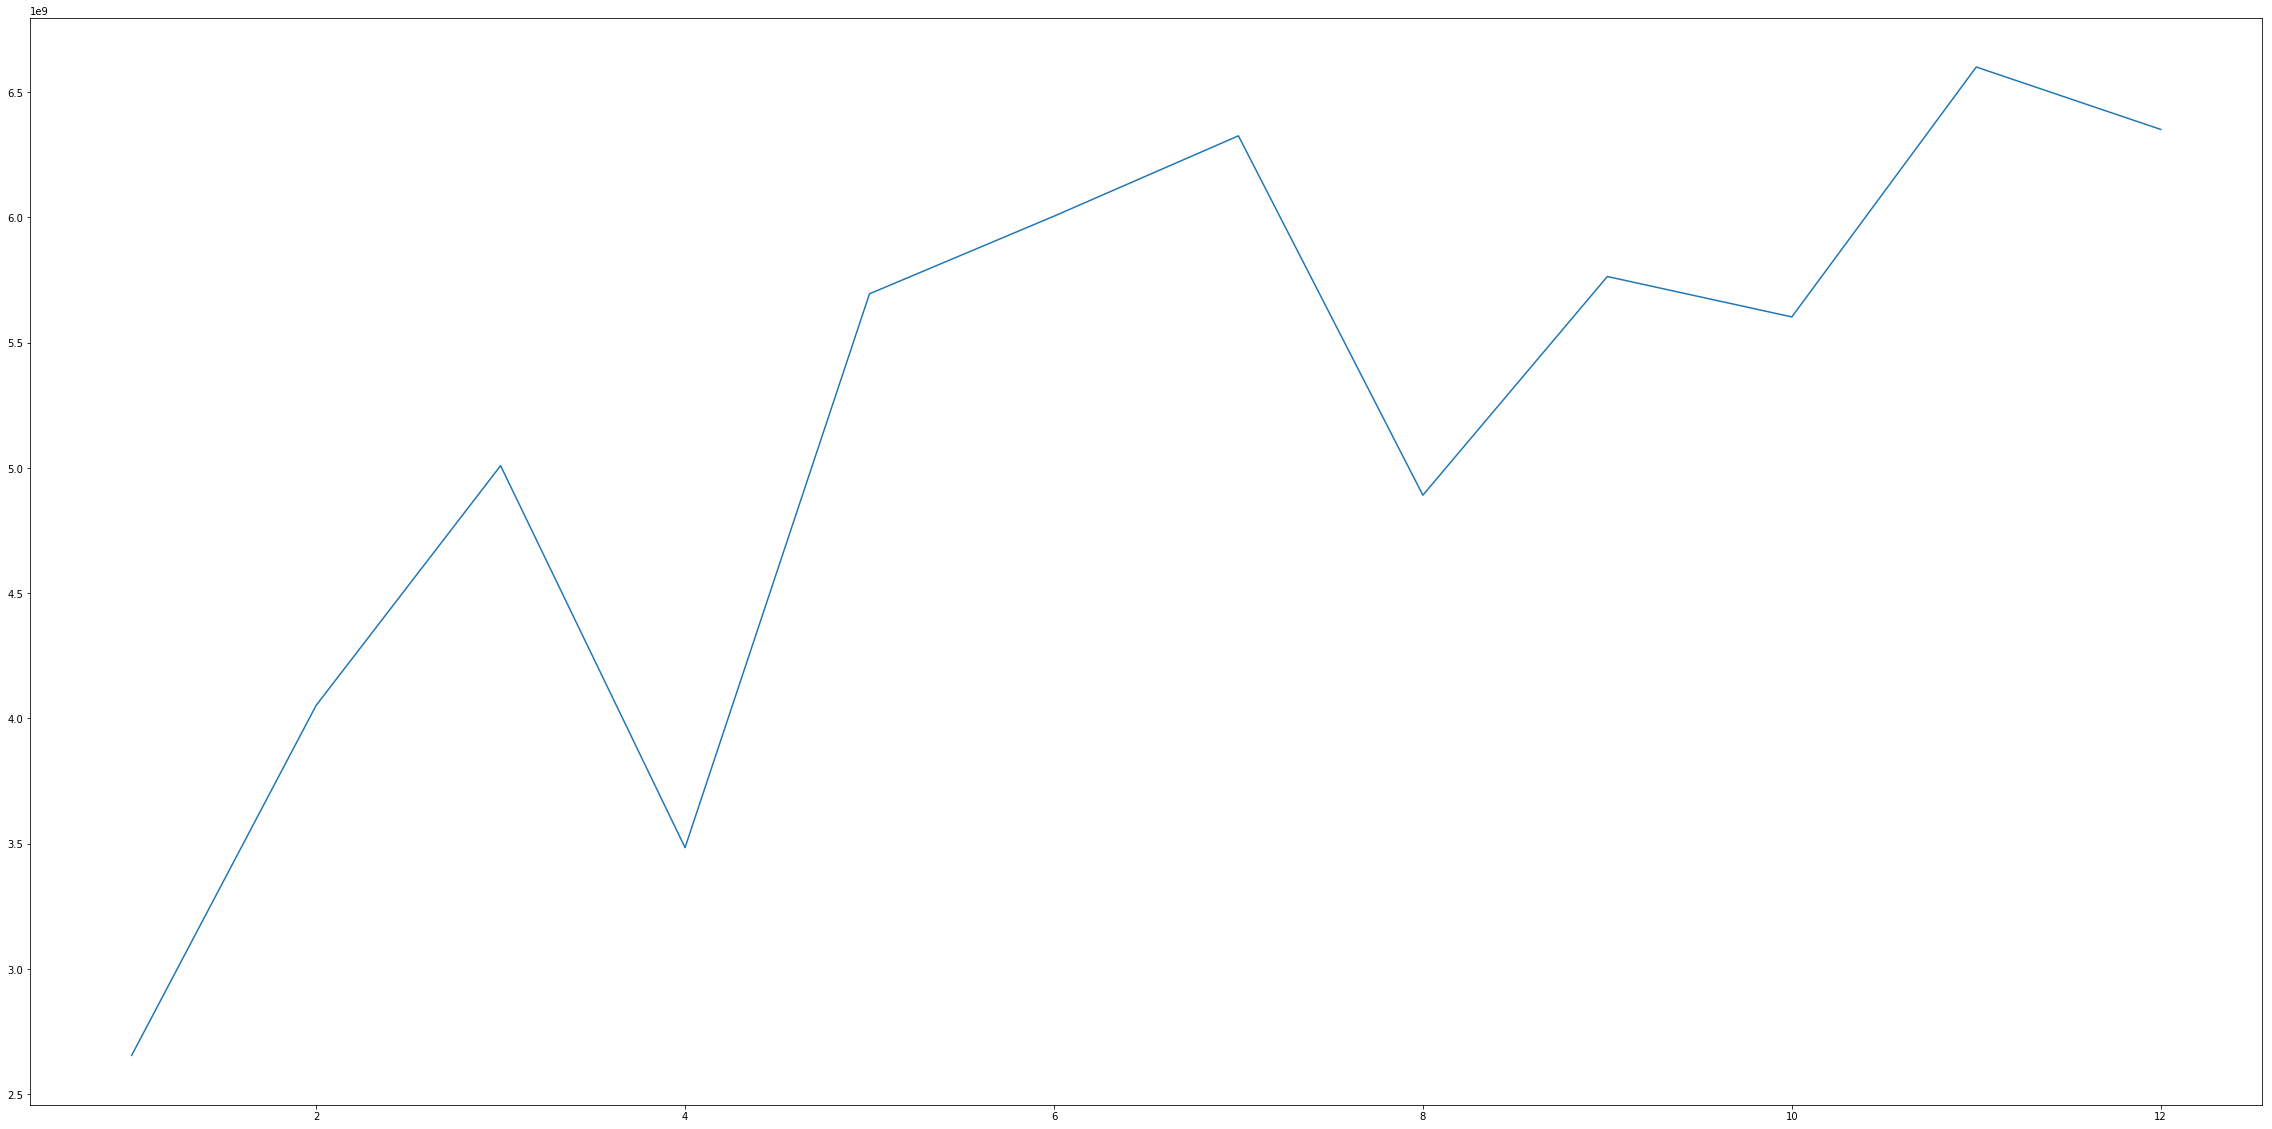

In [12]:
monthly_sales = sales_data[["SALE PRICE", "SALE MONTH"]].groupby("SALE MONTH").sum()
plt.plot(monthly_sales)
plt.show()

## By year

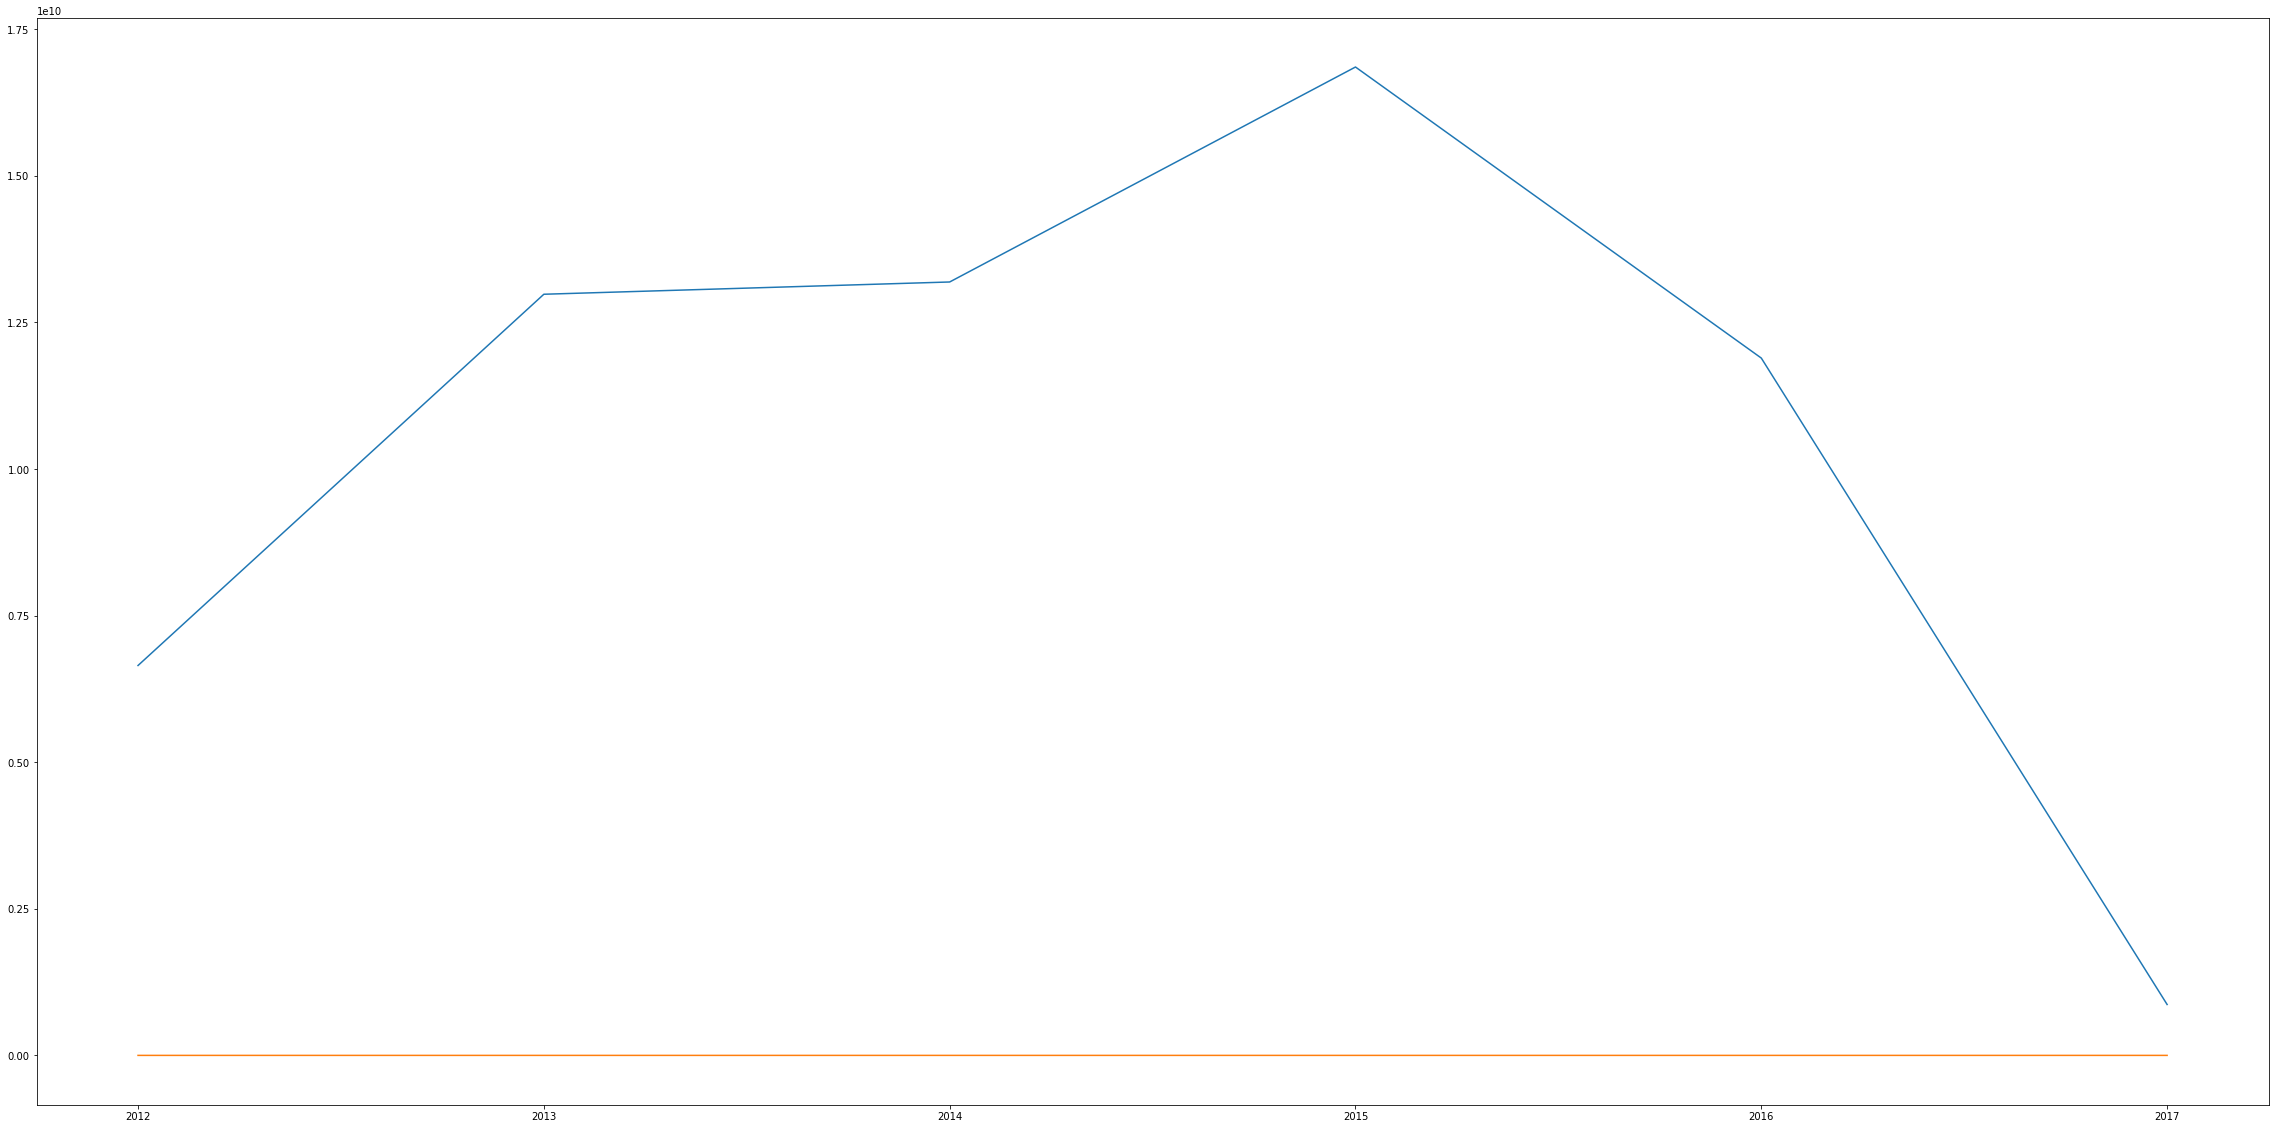

In [20]:
yearly_sales = sales_data[["SALE PRICE", "SALE YEAR"]].groupby("SALE YEAR").sum()
yearly_count = sales_data[["SALE PRICE", "SALE YEAR"]].groupby("SALE YEAR").count()
plt.plot(yearly_sales)
plt.plot(yearly_count)
plt.show()

## By day

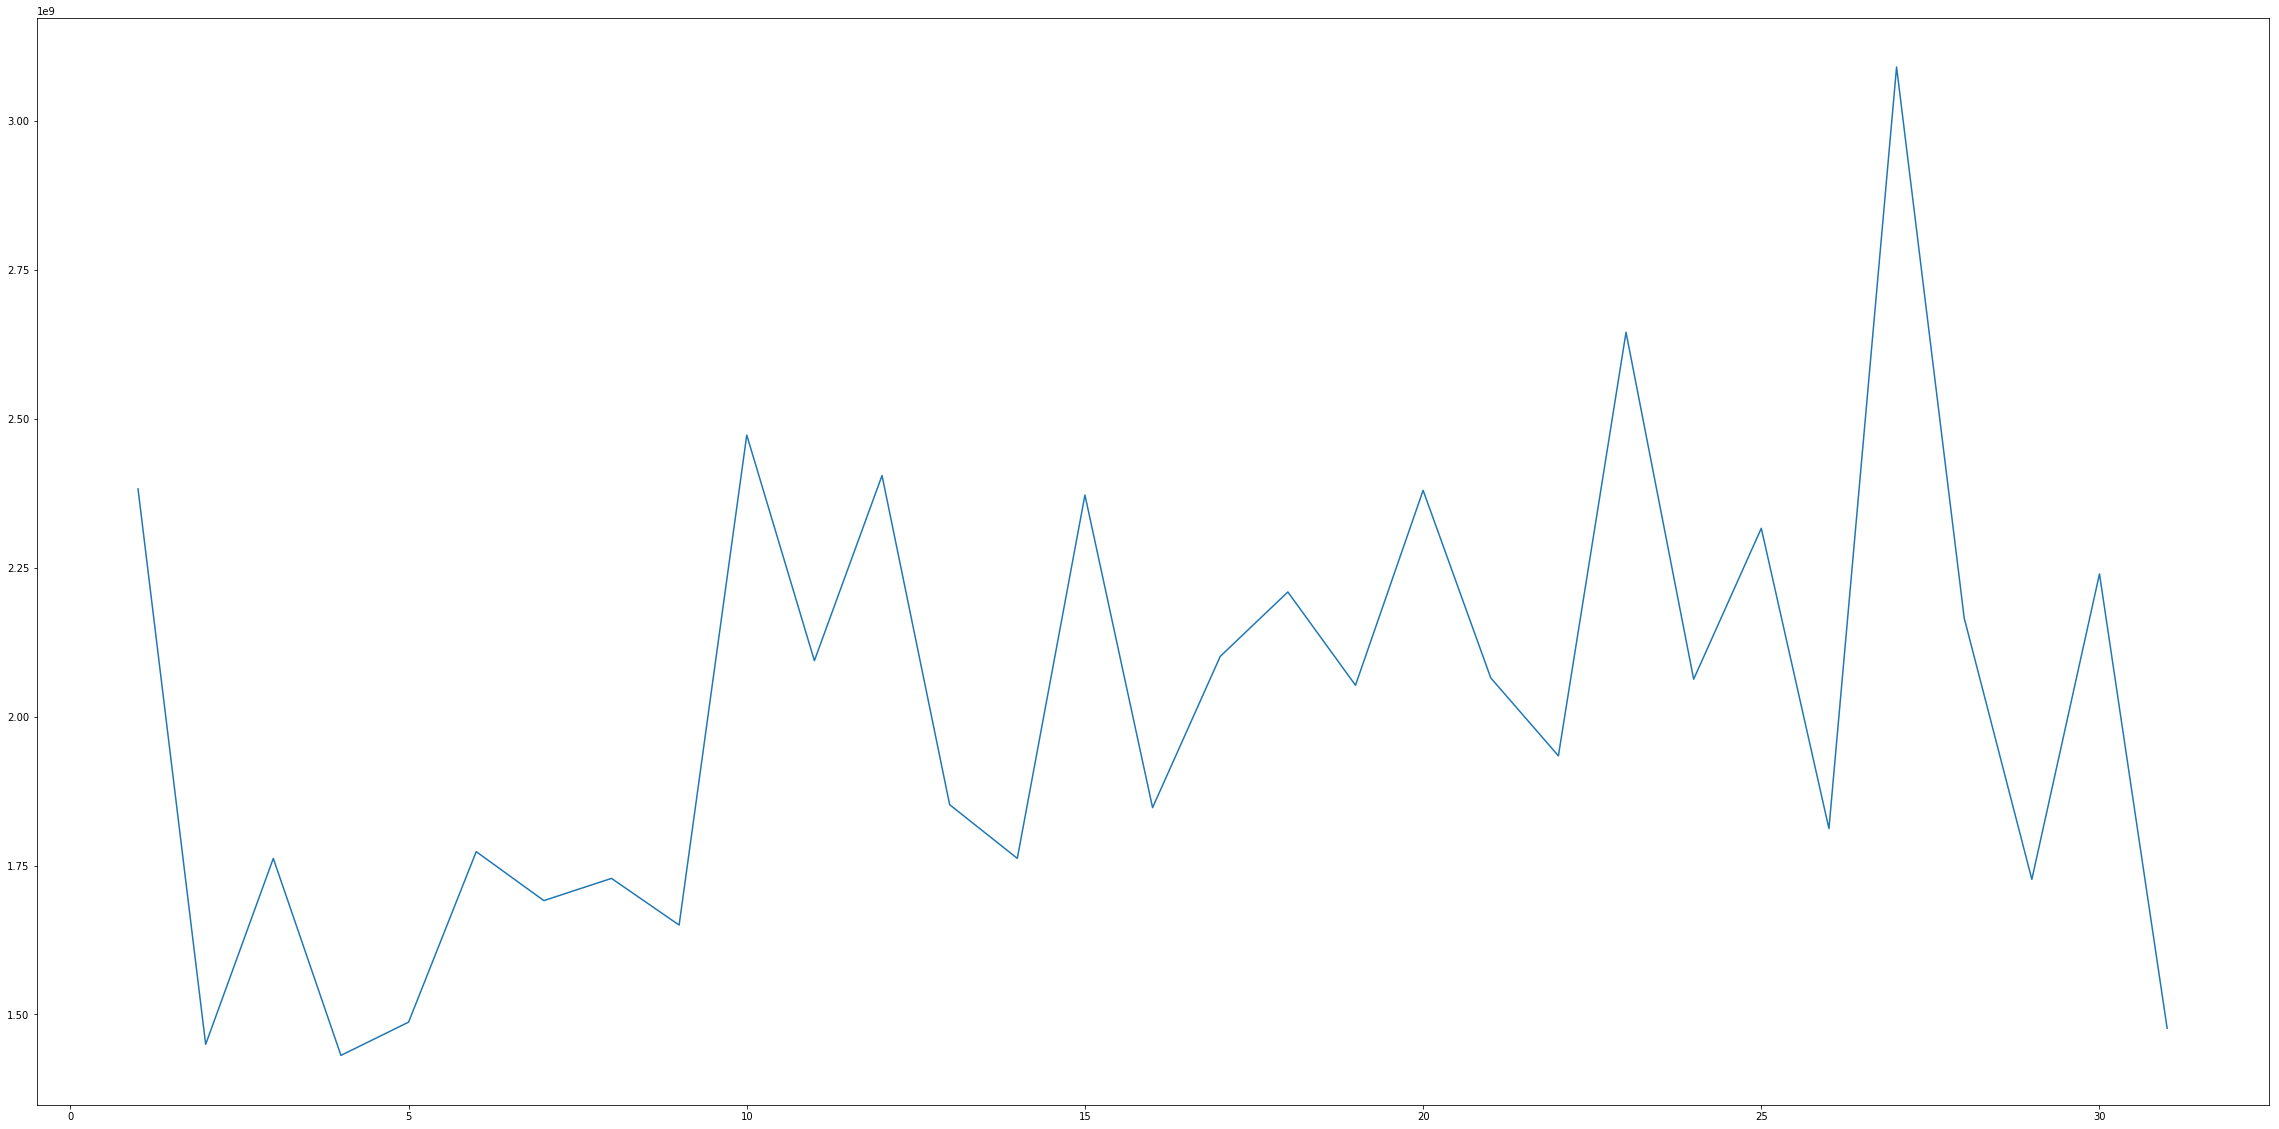

In [15]:
daily_sales = sales_data[["SALE PRICE", "SALE DAY"]].groupby("SALE DAY").sum()
plt.plot(daily_sales)
plt.show()